In [0]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [13]:
!ls

abprloss1  adc.json    avbprloss2  bprloss2	vbprloss1
abprloss2  avbprloss1  bprloss1    sample_data	vbprloss2


In [0]:
!pip install -U -q PyDrive

In [111]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 授权登录，仅第一次的时候会鉴权
def login_google_drive():
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  return drive

# 列出id对应目录的所有文件
# "q" 查询条件教程详见：https://developers.google.com/drive/v2/web/search-parameters
def list_file(drive, dir_id_str):
  file_list = drive.ListFile({'q': dir_id_str+" in parents and trashed=false"}).GetList()
  for file1 in file_list:
    print('title: %s, id: %s, mimeType: %s' % (file1['title'], file1['id'], file1["mimeType"]))

def cache_data(file_name, file_id_str):
  # id 替换成上一步读取到的对应文件 id
  u_data = drive.CreateFile({'id': file_id_str}) 
  
  #这里的下载操作只是缓存，不会在你的Google Drive 目录下多下载一个文件
  u_data.GetContentFile(file_name, "text/plain")
  print(file_name+"缓存成功")

def load_data(filename):
    titles = []
    print("正在加载数据...")
    with open(filename, "r") as f:
        for line in f.readlines():
            titles.append(line.strip())
            
    print("一共加载了 %s 个标题" % len(titles))

    return titles
  
drive = login_google_drive()
cache_data("abprloss1","1WF2CS75t9tZNcpb9-U8pBz7q8BSjdhQ8")
cache_data("abprloss2","1StWhPmvrRs_D9ooYxGfB-pzLqeMJPOSg")
cache_data("avbprloss1","1sG9TAgkGUZNwdNAi9m3Hhz0xMN3ZQ6rp")
cache_data("avbprloss2","1DlmK3AKqHmXHPLT6pNeIlpOaLo323CGA")
#list_file(drive,"'116VaKZu0-lRgLAfaz94Aq9MmkirhBJ_y'")

abprloss1缓存成功
abprloss2缓存成功
avbprloss1缓存成功
avbprloss2缓存成功


In [157]:
yy = []
yauc = []

for file in ["abprloss1", "abprloss2","avbprloss1","avbprloss2"]:
  #print(file)
  with open(file, 'r') as f:
    y1 = []  #loss
    y2 = []  #cold_start_loss
    y3 = []  #auc
    y4 = []  #cold_start_auc
    lines = f.readlines()
    for li in lines:
      value = [str(s) for s in li.split(' ')]
      if(value[0]=="train_loss:"):
          y1.append(float(value[1]))
          y3.append(float(value[5]))
          #print(value[5])
      elif(value[0]=="cold"):
          y2.append(float(value[4]))
          y4.append(float(value[9]))
          #print(value[4])
          #print(value[9])
    yy.append(y1)      
    yy.append(y2)
    yauc.append(y3)
    yauc.append(y4)
print((yy[5]))


[2.0023828877343073, 1.5575639605522156, 1.294963753537128, 1.1195609004873979, 1.0812435393983668, 1.0192726131143242, 1.0701638585642765, 1.0478744208812714, 1.0253378703044012, 1.0227542589319514, 1.059186373765652, 1.0379795625805854, 0.8811538712731724, 1.2805035138452374, 1.1619075652625825, 1.2167832834853067, 1.1949344794539845, 1.047946142799714, 1.0994252990931273, 0.9771600241462389]


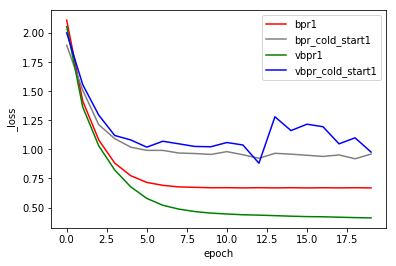

In [156]:
y0 = yy[0]
y1 = yy[1]
y2 = yy[4]
y3 = yy[5]

x = range(0,20,1)
#print(y)
plt.plot(x,y0[:20], color='red', label='bpr1')
plt.plot(x,y1[:20], color='grey', label='bpr_cold_start1')
plt.plot(x,y2[:20], color='green', label='vbpr1')
plt.plot(x,y3[:20], color='blue', label='vbpr_cold_start1')


plt.legend()    
plt.xlabel('epoch')
plt.ylabel('_loss')
plt.show()

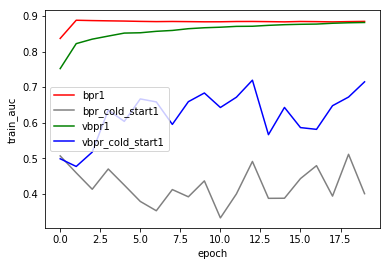

In [162]:
by0 = yauc[0]
by1 = yauc[1]
by2 = yauc[4]
by3 = yauc[5]

bx = range(0,20)
#print(y)
plt.plot(bx,by0[:20], color='red', label='bpr1')
plt.plot(bx,by1[:20], color='grey', label='bpr_cold_start1')
plt.plot(bx,by2[:20], color='green', label='vbpr1')
plt.plot(bx,by3[:20], color='blue', label='vbpr_cold_start1')

plt.legend()    
plt.xlabel('epoch')
plt.ylabel('train_auc')
plt.show()

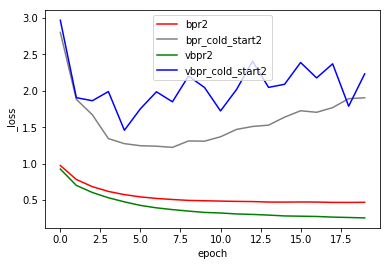

In [165]:
y0 = yy[2]
y1 = yy[3]
y2 = yy[6]
y3 = yy[7]

x = range(0,20,1)
#print(y)
plt.plot(x,y0[:20], color='red', label='bpr2')
plt.plot(x,y1[:20], color='grey', label='bpr_cold_start2')
plt.plot(x,y2[:20], color='green', label='vbpr2')
plt.plot(x,y3[:20], color='blue', label='vbpr_cold_start2')


plt.legend()    
plt.xlabel('epoch')
plt.ylabel('_loss')
plt.show()

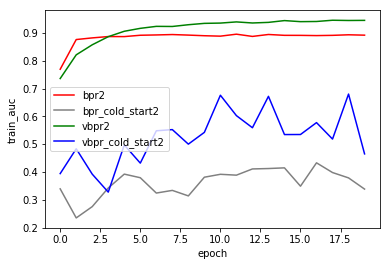

In [166]:
by0 = yauc[2]
by1 = yauc[3]
by2 = yauc[6]
by3 = yauc[7]

bx = range(0,20)
#print(y)
plt.plot(bx,by0[:20], color='red', label='bpr2')
plt.plot(bx,by1[:20], color='grey', label='bpr_cold_start2')
plt.plot(bx,by2[:20], color='green', label='vbpr2')
plt.plot(bx,by3[:20], color='blue', label='vbpr_cold_start2')

plt.legend()    
plt.xlabel('epoch')
plt.ylabel('train_auc')
plt.show()
